In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
data_dir = './data/Ravdess/Actor_01'
audio_files = glob(data_dir+"/*.wav")

In [3]:
audio_files

['./data/Ravdess/Actor_01\\03-01-01-01-01-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-01-01-01-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-01-01-02-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-01-01-02-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-01-01-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-01-01-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-01-02-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-01-02-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-02-01-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-02-01-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-02-02-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-02-02-02-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-01-01-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-01-01-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-01-02-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-01-02-02-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-02-01-01-01.wav',
 './data/Ravdess/Actor_01\\03-01-03-02-01-02-01.wav',
 './data/Ravdess/Actor_01\\0

In [4]:
file = audio_files[0]

In [5]:
signal,sr = librosa.load(file,sr=22050) # sr = sampling rate # signal is a numpy array with num of values=sr*duration of sound
# each value in numpy is the amplitude of wave form

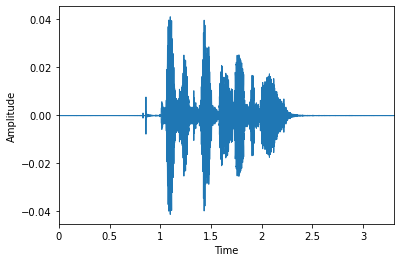

In [6]:
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig('wave_form.png')

In [9]:
# Moving from time domain to frequency domain > complex values
fft = np.fft.fft(signal)
fft

array([ 0.06667195-6.24500451e-17j, -0.0600817 +6.52619435e-04j,
        0.03079933-1.01554493e-02j, ...,  0.00614893-2.03039672e-02j,
        0.03079933+1.01554493e-02j, -0.0600817 -6.52619435e-04j])

In [10]:
magnitude = np.abs(fft)
magnitude

array([0.06667195, 0.06008524, 0.03243042, ..., 0.02121463, 0.03243042,
       0.06008524])

In [11]:
frequency = np.linspace(0,sr,len(magnitude))

Text(0, 0.5, 'Magnitude')

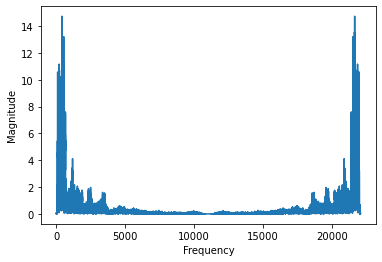

In [12]:
plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel('Magnitude')

In [13]:
#symmetric plot : we need only the half
left_frequency = frequency[:int(len(frequency)/2)]

In [14]:
left_magnitude = magnitude[:int(len(magnitude)/2)]

Text(0, 0.5, 'Magnitude')

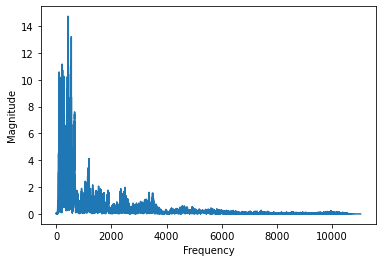

In [15]:
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel('Magnitude')

In [16]:
# creating short term fourier transform
hop_length = 512
n_fft = 2048

In [17]:
stft = librosa.core.stft(signal,n_fft=n_fft,hop_length=hop_length)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

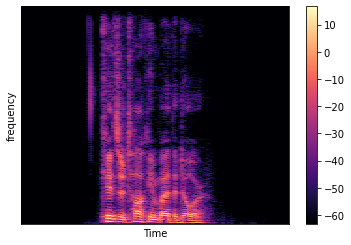

In [18]:
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('frequency')
plt.colorbar()

In [19]:
#MFCC :
MFCCs = librosa.feature.mfcc(signal,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

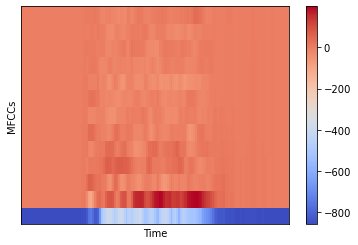

In [20]:
librosa.display.specshow(MFCCs,sr=sr,hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCCs')
plt.colorbar()

In [34]:
zero_CR=librosa.feature.zero_crossing_rate(signal)

In [35]:
zero_CR.shape

(1, 143)

In [36]:
signal.shape

(72838,)

In [37]:
72838/143

509.35664335664336

In [39]:
(143/72838)*1000

1.9632609352261183

In [41]:
pitches, magnitudes = librosa.piptrack(signal, sr=sr)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
pitches.shape

(1025, 143)

In [47]:
(pitches != 0).sum()

5829

In [46]:
1025*143

146575

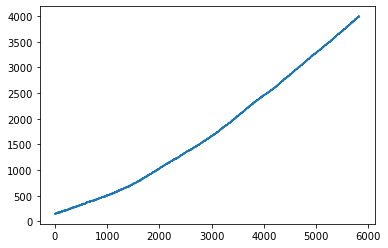

In [51]:
plt.plot(pitches[pitches!=0])

In [70]:
signal1,sr = librosa.load(audio_files[55],sr=22050) 

In [71]:
pitches, magnitudes = librosa.piptrack(signal, sr=sr)

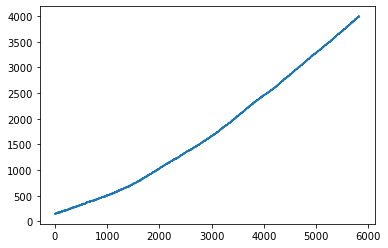

In [72]:
plt.plot(pitches[pitches!=0])